# Get Daily Vol

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [3]:
df.index.is_monotonic_increasing

True

In [4]:
df.head()

,open,high,low,close,volume
time,,,,,
2017-08-17 04:21:13.356,4261.48,4280.56,4261.48,4266.29,5.002297
2017-08-17 04:29:19.766,4266.29,4270.41,4261.32,4267.47,5.356629
2017-08-17 04:33:00.057,4261.45,4280.56,4261.45,4267.99,7.935627
2017-08-17 04:39:32.027,4296.63,4300.38,4296.63,4300.38,5.027790
2017-08-17 04:43:05.191,4300.38,4300.38,4300.38,4300.38,5.109679


In [5]:
def get_daily_vol(close, span0=10000):
    """
    daily vol, reindexed to close
    
    Arguments:
    close -- daily close (probably Pandas series)
    span0 -- span lol (probably int)
    Purpose:
    use the output of this function to set default profit taking and stop-loss limit
    """
    df0 = close.index.searchsorted(close.index-pd.Timedelta(days=2))
    df0=df0[df0>0]
    df0=pd.Series(close.index[df0-1], index=close.index[close.shape[0]-df0.shape[0]:])
    df0=close.loc[df0.index]/close.loc[df0.values].values-1 # daily returns
    df0=df0.ewm(span=span0).std()
    return df0

In [6]:
vol = get_daily_vol(df.close)

In [7]:
vol

time
2017-08-19 04:25:59.354         NaN
2017-08-19 04:57:14.915    0.016215
2017-08-19 05:16:47.885    0.011695
2017-08-19 05:31:30.438    0.013451
2017-08-19 06:05:00.076    0.011669
                             ...   
2021-06-19 16:27:04.502    0.012078
2021-06-19 16:27:20.667    0.012077
2021-06-19 16:27:26.627    0.012076
2021-06-19 16:27:44.405    0.012075
2021-06-19 16:27:48.270    0.012074
Name: close, Length: 11798483, dtype: float64

In [9]:
print(f"max: {max(vol[1:])}")
print(f"min: {min(vol[1:])}")
print(f"mean: {np.mean(vol)}")
print(f"median: {np.median(vol[1:])}")

max: 0.15677271710535778
min: 0.0036702801383765335
mean: 0.02651504315228314
median: 0.022812545829035108


In [12]:
vol.to_csv("../data/vol.csv")

## Plotting

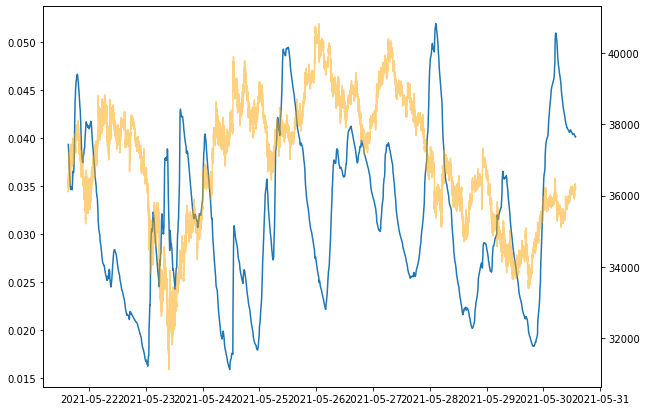

In [32]:
plot = df[-500_000:-300_000]

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(plot.vol)

ax1 = ax.twinx()
ax1.plot(plot.close, color='orange', alpha=.5)